In [175]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [176]:
df = pd.read_csv('public_seoul_cctv_2017.csv', encoding='EUC-KR')
df.head(10)

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,"1,131"
4,혜화,215,481
5,용산,632,"1,897"
6,성북,453,"1,276"
7,동대문,486,"1,396"
8,마포,703,952
9,영등포,745,"1,122"


경찰서 콜롬을 인덱스로 사용.

In [177]:
df.set_index('경찰서', inplace=True)           

콤마가 있는 값들에서 콤마제거 

In [178]:
df['개소'] = df['개소'].str.replace(",","")
df['대수'] = df['대수'].str.replace(",","")

정수 타입으로 변경

In [179]:
df['개소'] = df['개소'].astype(int)
df['대수'] = df['대수'].astype(int)

합 콜럼을 새로 만들어서 정렬한후 후에 필요 없기 때문에 제거. 

In [180]:
df['합']=df['개소']+df['대수']
df = df.sort_values(by=['합'], ascending=False)
del(df['합'])

첫번째 0은 총합이기 때문에 1~32까지 스택바그래프 

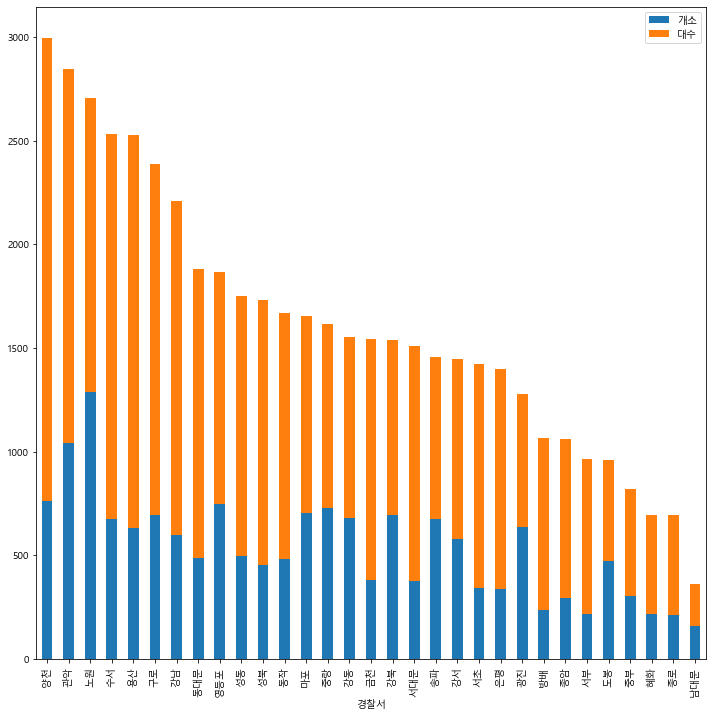

In [198]:
df[1:32].plot.bar(stacked=True)

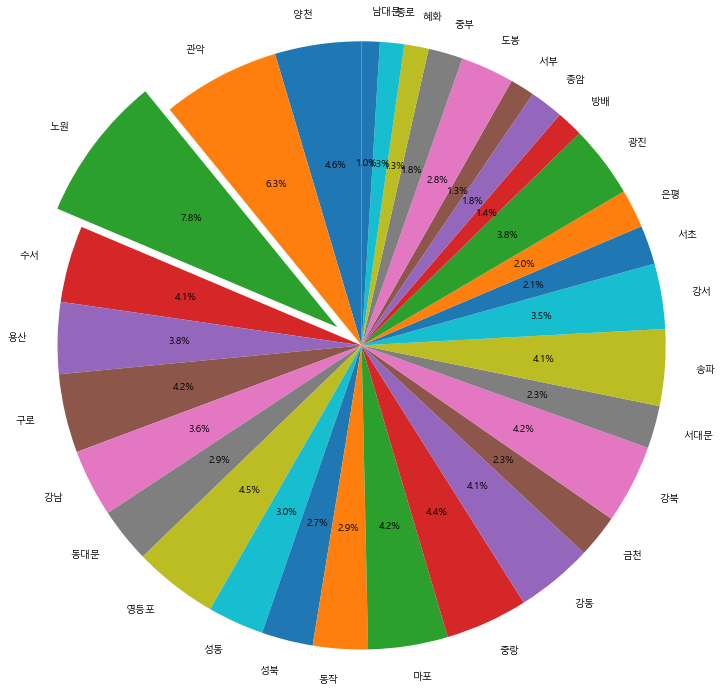

In [229]:
plt.rcParams['figure.figsize'] = (12,12)

labels1 = list(df[1:32].index)
sizes1  = list(df[1:32]['개소'].values)

## explode 자동화 
explode1 = np.zeros(len(sizes1))
max_index1 = sizes1.index(max(sizes1))
explode1[max_index1] = 0.1

fig1, ax1 = plt.subplots()
ax1.pie(sizes1,labels=labels1,explode=explode1, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal') 

plt.show()

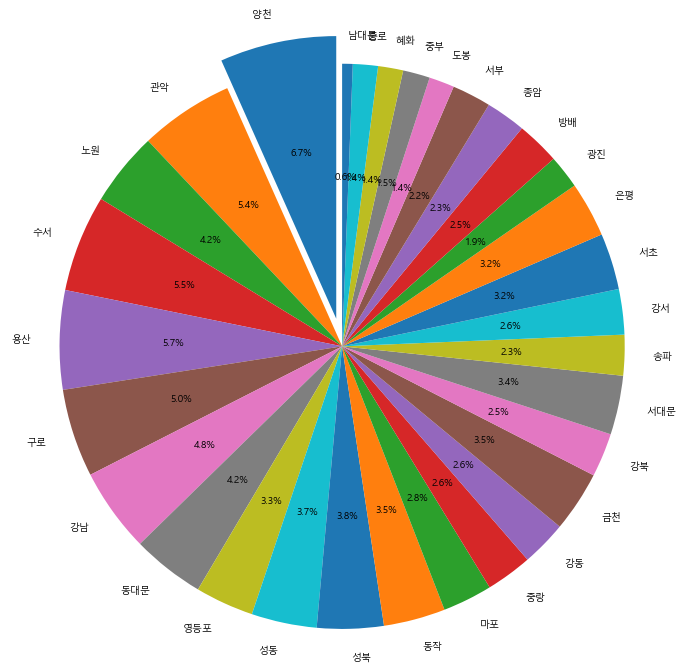

In [209]:
plt.rcParams['figure.figsize'] = (12,12)

labels2 = list(df[1:32].index)
sizes2  = list(df[1:32]['대수'].values)


explode2 = np.zeros(len(sizes2))
max_index2 = sizes2.index(max(sizes2))
explode2[max_index2] = 0.1

fig1, ax2 = plt.subplots()
ax2.pie(sizes2,labels=labels2, explode=explode2,autopct='%1.1f%%',shadow=False, startangle=90)
ax2.axis('equal') 

plt.show()

<Figure size 1440x1440 with 0 Axes>

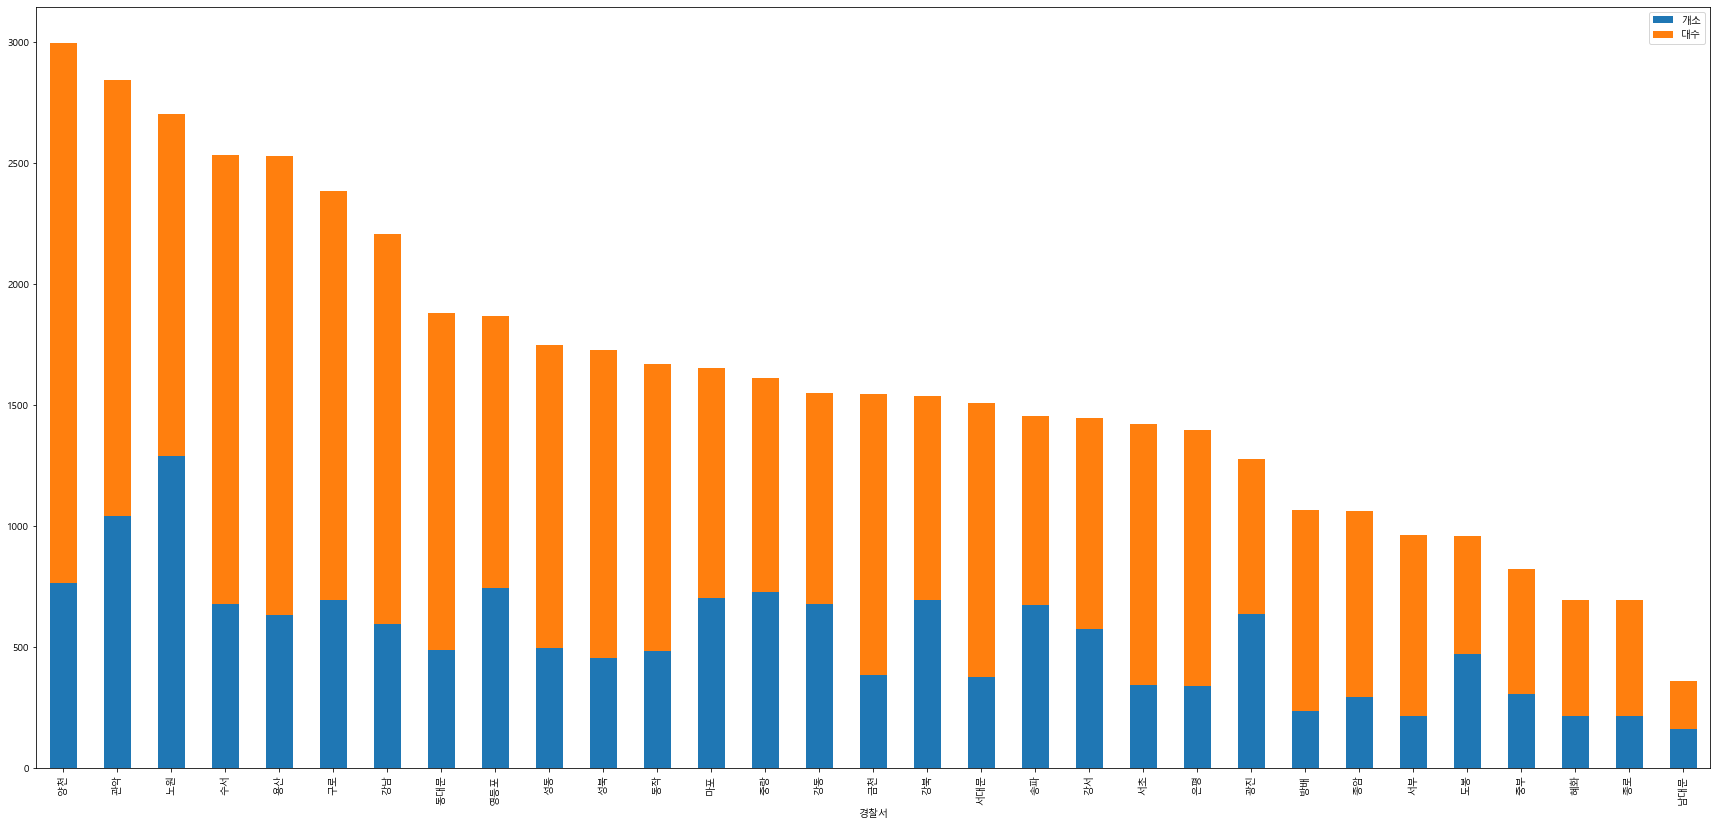

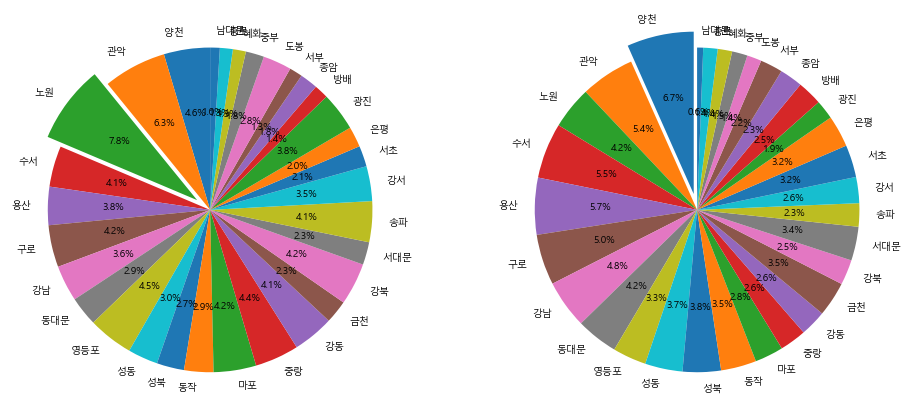

In [272]:
plt.figure(figsize=(20,20))

plt.rcParams['figure.figsize'] = (30,14)
df[1:32].plot.bar(stacked=True)

plt.rcParams['figure.figsize'] = (16,16)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.pie(sizes1,labels=labels1,explode=explode1, autopct='%1.1f%%',shadow=False, startangle=90)
ax2.pie(sizes2,labels=labels2, explode=explode2,autopct='%1.1f%%',shadow=False, startangle=90)

plt.show()